In [1]:
import mlflow
import torch

In [2]:
import os
print(os.environ)  # Prints all environment variable

environ({'SHELL': '/bin/bash', 'CONDA_EXE': '/home/saklani/.conda/bin/conda', '_CE_M': '', 'LANGUAGE': '', 'PWD': '/tmp/pycharm_project_149', 'LOGNAME': 'saklani', 'CONDA_ROOT': '/home/saklani/.conda', 'XDG_SESSION_TYPE': 'tty', 'CONDA_PREFIX': '/home/saklani/.conda/envs/dino-tracker', 'JETBRAINS_REMOTE_RUN': '1', 'MOTD_SHOWN': 'pam', 'HOME': '/home/saklani', 'LANG': 'en_US.UTF-8', 'CONDA_PROMPT_MODIFIER': '(dino-tracker) ', 'SSH_CONNECTION': '71.7.145.48 49260 129.173.66.175 22', 'XDG_SESSION_CLASS': 'user', 'PYTHONPATH': '/tmp/pycharm_project_149/', '_CE_CONDA': '', 'USER': 'saklani', 'CONDA_SHLVL': '1', 'SHLVL': '1', 'XDG_SESSION_ID': '1814', 'CONDA_PYTHON_EXE': '/home/saklani/.conda/bin/python', 'XDG_RUNTIME_DIR': '/run/user/1006', 'SSH_CLIENT': '71.7.145.48 49260 22', 'CONDA_DEFAULT_ENV': 'dino-tracker', 'LC_ALL': 'en_US.UTF-8', 'PATH': '/home/saklani/.conda/envs/dino-tracker/bin:/home/saklani/.conda/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:

In [3]:
import huggingface_hub

In [4]:
import transformers

/home/saklani/.conda/envs/dino-tracker/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import torch

In [6]:
print(torch.cuda.is_available())

True


In [7]:
print(torch.cuda.current_device())

0


In [8]:
print(torch.cuda.device_count())

1


In [9]:
print(torch.cuda.get_device_name(0))
#

NVIDIA GeForce RTX 4090


In [10]:
%pip install datasets
%pip install transformers[torch]
%pip install torch
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor, TrainingArguments, Trainer
from datasets import load_dataset

# Load the MNIST dataset
dataset = load_dataset('mnist')

# Define the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# Preprocess the data
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x.convert("RGB") for x in example_batch['image']], return_tensors='pt')
    inputs['label'] = example_batch['label']
    return inputs

# Apply the transform to the dataset
prepared_ds = dataset.with_transform(transform)

# Define the model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=10)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    evaluation_strategy="epoch",
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir='./logs',
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_ds['test'],
    tokenizer=feature_extractor,
)

# Train the model
trainer.train()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/home/saklani/.conda/envs/dino-tracker/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/saklani/.conda/envs/dino-tracker/lib/python3.9/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_1976377/2215847865.py:40: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processi

KeyError: 'image'

In [2]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    evaluation_strategy="epoch",
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir='./logs',
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_ds['test'],
    tokenizer=feature_extractor,
)

# Train the model
trainer.train()

/home/saklani/.conda/envs/dino-tracker/lib/python3.9/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_1129010/747375601.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


KeyError: 'image'

In [3]:
%pip install 'accelerate>=0.26.0'

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTImageProcessor, TrainingArguments, Trainer
from datasets import load_dataset

# Load the MNIST dataset
dataset = load_dataset('mnist')

# Define the feature extractor
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')

# Preprocess the data
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x.convert("RGB") for x in example_batch['image']], return_tensors='pt')
    inputs['label'] = example_batch['label']
    return inputs

# Apply the transform to the dataset
prepared_ds = dataset.with_transform(transform)

# Define the model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=10)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=16,
    eval_strategy="epoch",
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir='./logs',
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_ds['test'],
    processing_class=feature_extractor,
)

# Train the model
trainer.train()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: 'image'

In [4]:
%pip install datasets transformers

Note: you may need to restart the kernel to use updated packages.


In [8]:
from datasets import load_dataset

ds = load_dataset('beans')
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [9]:
ex = ds['train'][400]
ex

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/bean_rust/bean_rust_train.148.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 1}

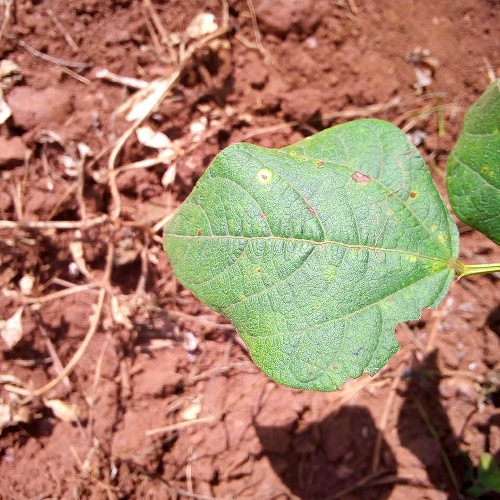

In [10]:
image = ex['image']
image


In [11]:
labels = ds['train'].features['labels']
labels

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

In [12]:
labels.int2str(ex['labels'])

'bean_rust'

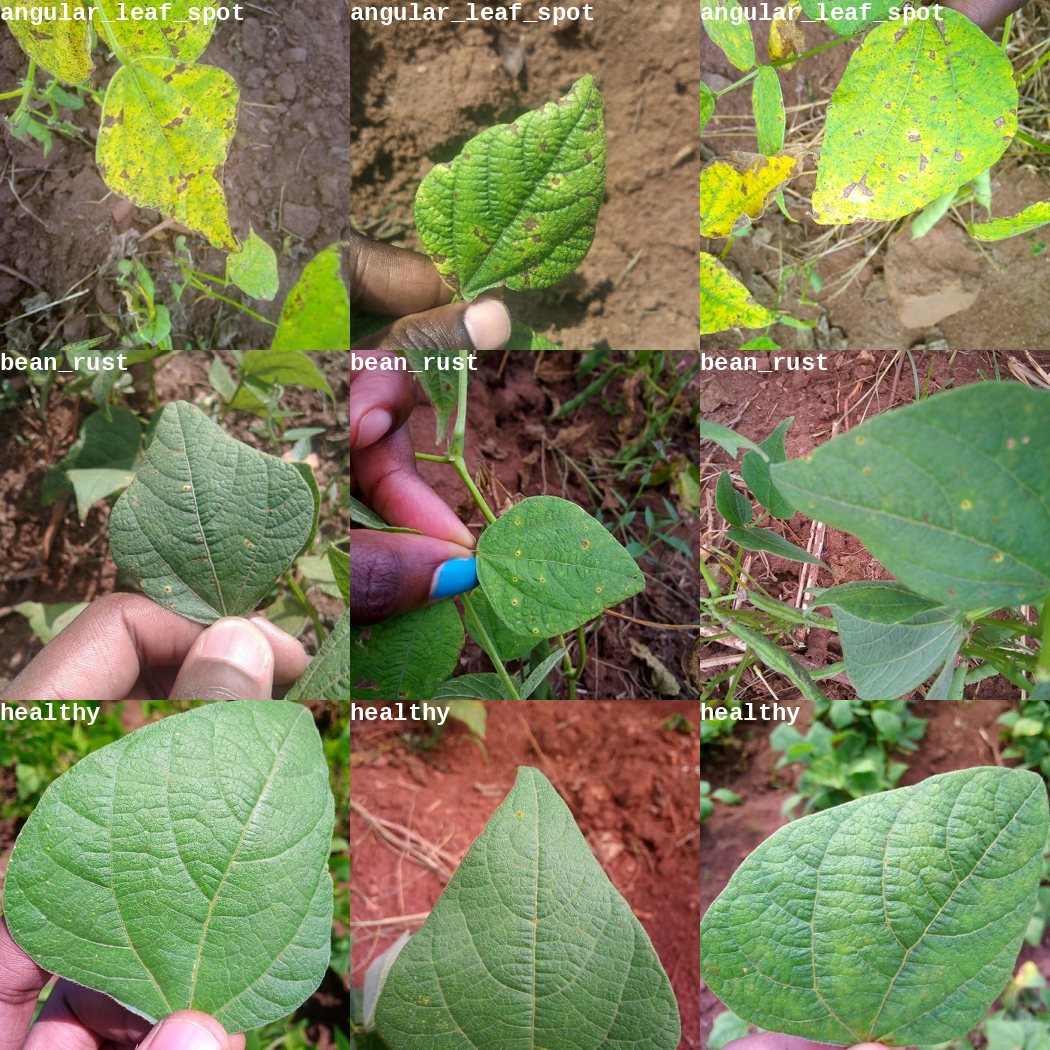

In [13]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['labels'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)


In [14]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

In [15]:
processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [16]:
processor_output = processor(image, return_tensors='pt')
shape = processor_output['pixel_values'].shape
print(shape)

torch.Size([1, 3, 224, 224])


In [17]:
def process_example(example):
    image = example['image']
    inputs = processor(image, return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [18]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.5686, -0.5686, -0.5608,  ..., -0.0275,  0.1843, -0.2471],
          [-0.6078, -0.6000, -0.5765,  ..., -0.0353, -0.0196, -0.2627],
          [-0.6314, -0.6314, -0.6078,  ..., -0.2314, -0.3647, -0.2235],
          ...,
          [-0.5373, -0.5529, -0.5843,  ..., -0.0824, -0.0431, -0.0902],
          [-0.5608, -0.5765, -0.5843,  ...,  0.3098,  0.1843,  0.1294],
          [-0.5843, -0.5922, -0.6078,  ...,  0.2627,  0.1608,  0.2000]],

         [[-0.7098, -0.7098, -0.7490,  ..., -0.3725, -0.1608, -0.6000],
          [-0.7333, -0.7333, -0.7569,  ..., -0.3647, -0.3255, -0.5686],
          [-0.7490, -0.7490, -0.7725,  ..., -0.5373, -0.6549, -0.5373],
          ...,
          [-0.7725, -0.7804, -0.8196,  ..., -0.2235, -0.0353,  0.0824],
          [-0.7961, -0.8118, -0.8118,  ...,  0.1922,  0.3098,  0.3725],
          [-0.8196, -0.8196, -0.8275,  ...,  0.0824,  0.2784,  0.3961]],

         [[-0.9922, -0.9922, -1.0000,  ..., -0.5451, -0.3569, -0.7255],
          [-0